In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv("football_data.csv")
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
df.drop(columns=[df.columns[0],df.columns[-1]],inplace=True)

In [6]:
req_cols=["ID","Preferred Foot","Weak Foot","Skill Moves","Work Rate",'Body Type', 'Real Face', 'Position', 'Height', 'Weight',
        'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [7]:
temp_df=df[req_cols]
data=temp_df.values
ind=[]
for i in range(2):
    if(temp_df[req_cols[i]].isnull().values.any()):
        ind.extend(temp_df[temp_df[req_cols[i]].isnull()].index.to_list())

ind=list(set(ind))
temp_df=temp_df.drop(index=ind).reset_index()
temp_df.drop(columns="index",inplace=True)
# print(temp_df)
def cacl_height(x):
  # print(x)
  x=x.split("'")
  if(not(x[0].isnumeric())):
    return -1
  else:
    if(len(x)==1):
      return int(x[0])
  height=int(x[0])*12+int(x[1])
  return height


def calc_weight(x):
  x=x[:-3]
  if(not(x.isnumeric()) or len(x)==0):
    return -1
  return int(x)

def calc_pref(x):
  if(x.lower()!="right" and x.lower()!="left"):
    return -1
  return x.lower()

temp_df["Height"]=temp_df["Height"].apply(lambda x : cacl_height(x))
temp_df["Weight"]=temp_df["Weight"].apply(lambda x: calc_weight(x))
temp_df["Preferred Foot"]=temp_df["Preferred Foot"].apply(lambda x: calc_pref(x))
inc=[]
for i in range(len(temp_df)):
  if(temp_df["Height"][i]==-1 or temp_df["Weight"][i]==-1 or temp_df["Preferred Foot"][i]==-1):
    inc.append(i)

temp_df=temp_df.drop(index=inc).reset_index()
temp_df.drop(columns="index",inplace=True)

In [8]:
prefixes=[]
categorical=[]
data=temp_df.values
for i in range(data.shape[1]):
    if(type(data[0][i])==str):
        categorical.append(i)

for i in categorical:
    prefixes.append(req_cols[i])
    print(df[req_cols[i]].nunique(),req_cols[i])
    
df1=pd.get_dummies(temp_df,prefix=prefixes)
def NormalizeData(data):
  return (data - np.min(data)) / (np.max(data) - np.min(data))
for i in ["Height","Weight"]:
  if(type(df1[i][0])!=str):
    df1[i]=NormalizeData(df1[i])
df1

30 Preferred Foot
13 Work Rate
17 Body Type
5 Real Face
28 Position


,ID,Weak Foot,Skill Moves,Height,Weight,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,158023,4.0,4.0,0.30,0.368421,70.0,90.0,86.0,97.0,93.0,...,0,0,0,0,1,0,0,0,0,0
1,20801,4.0,5.0,0.65,0.548872,89.0,81.0,87.0,88.0,81.0,...,0,0,0,0,0,0,0,0,0,1
2,190871,5.0,5.0,0.40,0.300752,62.0,84.0,84.0,96.0,88.0,...,0,0,0,0,0,0,0,0,0,0
3,193080,3.0,1.0,0.75,0.436090,21.0,50.0,13.0,18.0,21.0,...,0,0,0,0,0,0,0,0,0,0
4,192985,5.0,4.0,0.50,0.330827,55.0,92.0,82.0,86.0,85.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18126,238813,2.0,2.0,0.40,0.180451,40.0,49.0,25.0,42.0,30.0,...,0,0,0,0,0,0,0,0,0,0
18127,243165,2.0,2.0,0.70,0.451128,52.0,43.0,36.0,39.0,32.0,...,0,0,0,0,0,0,0,0,0,1
18128,241638,3.0,2.0,0.35,0.285714,46.0,38.0,38.0,45.0,38.0,...,0,0,0,0,0,0,0,0,0,1
18129,246268,3.0,2.0,0.45,0.330827,39.0,42.0,40.0,51.0,34.0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
data=df1.values

In [10]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [11]:
from sklearn.cluster import AgglomerativeClustering
clust=[2,3,5,7]
linkage=["ward", "complete", "average", "single"]
cluster_arr=[]
for i in clust:
  links=[]
  for measure in linkage:
    clustering = AgglomerativeClustering(n_clusters=i, linkage=measure)
    labels=clustering.fit_predict(data[:,1:])
    links.append(labels)
  cluster_arr.append(links)



In [12]:
all_scores=[]
for i in cluster_arr:
  temp_scores=[]
  for j in i:
    temp_scores.append(silhouette_score(data[:,1:],j))
  all_scores.append(temp_scores)


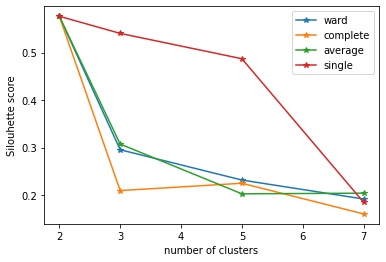

In [13]:
clust=[2,3,5,7]
all_scores=np.array(all_scores)
for i in range(len(linkage)):
  plt.plot(clust,all_scores[:,i],label=linkage[i],marker="*")
  plt.xlabel("number of clusters")
  plt.ylabel("Silouhette score")
plt.legend()

In [14]:
def calc_dist(a,b):
  return sum((a-b)**2)

def compute_loss(data,labels,num):
  clusters={i:[] for i in range(num)}
  for i in range(len(labels)):
    clusters[labels[i]].append(i)
  
  s=0
  for i in range(num):
    vals=data[clusters[i],1:]
    meand=np.mean(vals,axis=0)
    for j in range(len(clusters[i])):
        s+=calc_dist(meand,data[clusters[i][j]][1:])
  return s
  


all_losses=[]
for i in range(len(cluster_arr)):
  losses=[]
  for j in cluster_arr[i]:
    losses.append(compute_loss(data,j,clust[i]))
  all_losses.append(losses) 

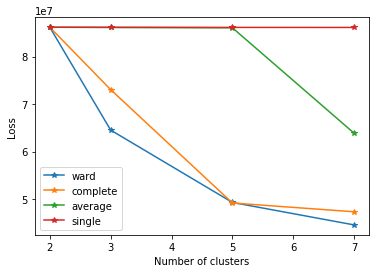

In [15]:
all_losses=np.array(all_losses)
for i in range(len(linkage)):
  plt.plot(clust,all_losses[:,i],label=linkage[i],marker="*")
  plt.xlabel("Number of clusters")
  plt.ylabel("Loss")
plt.legend()


##***Analysis***

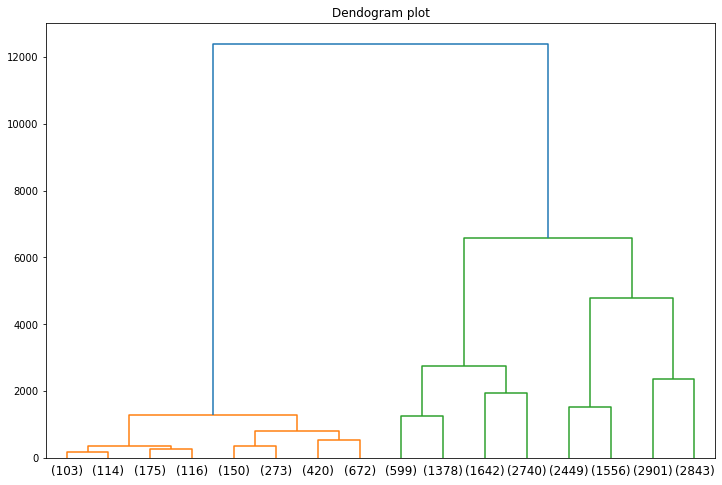

In [16]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data[:,1:])
plt.figure(figsize=(12,8))
plt.title("Dendogram plot")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

In [17]:
agglo=pd.DataFrame()
cols_sil=[i +" :Silhouette score" for i in linkage]
cols_loss=[i +" : loss" for i in linkage]
cols_sil.extend(cols_loss)
agglo=[]
for i in range(len(all_scores)):
  temp=all_scores[i].copy()
  temp=np.concatenate([temp,all_losses[i]])
  agglo.append(temp)
agglo=pd.DataFrame(agglo,columns=cols_sil)


In [18]:
agglo.index=[2,3,5,7]
agglo

,ward :Silhouette score,complete :Silhouette score,average :Silhouette score,single :Silhouette score,ward : loss,complete : loss,average : loss,single : loss
2,0.576408,0.576408,0.576408,0.576408,8.617206e+07,8.617206e+07,8.617206e+07,8.617206e+07
3,0.295300,0.209299,0.307268,0.540317,6.452812e+07,7.304440e+07,8.612170e+07,8.616310e+07
5,0.231453,0.224705,0.202457,0.486909,4.930565e+07,4.918783e+07,8.605627e+07,8.613800e+07
7,0.191506,0.160149,0.203833,0.184546,4.457570e+07,4.733938e+07,6.386484e+07,8.612639e+07


In [19]:
clust=[2,3,5,7]
agglo_intra=[]
agglo_inter=[]
for i in range(len(cluster_arr)):
  avg_var=0
  clusters={i:[] for i in range(clust[i])}
  labels=cluster_arr[i][0]
  for k in range(len(labels)):
    clusters[labels[k]].append(k)
  s=0
  for k in range(clust[i]):
    vals=data[clusters[k],:]
    meand=np.mean(vals[:,1:],axis=0)
    var=np.apply_along_axis(lambda x: calc_dist(x[1:],meand),1,vals)
    var=np.sum(var)/len(vals)
    avg_var+=var
  agglo_intra.append(avg_var/len(clusters))
  avg_inter=0
  for k in range(len(clusters)):
    for t in range(len(clusters)):
      if(k<t):
        vals=data[clusters[k],:]
        meand=np.mean(vals[:,1:],axis=0)
        vals1=data[clusters[t],:]
        meand1=np.mean(vals1[:,1:],axis=0)
        avg_inter+=calc_dist(meand,meand1)
  agglo_inter.append(avg_inter/((clust[i]*clust[i])-1)/2)






In [20]:
print(agglo_inter)
print(agglo_intra)
agglo_dists=pd.DataFrame()
agglo_dists["Avg_Inter_class_distance"]=agglo_inter
agglo_dists["Avg_Intra_class_distance"]=agglo_intra
agglo_dists.index=clust
agglo_dists

[7134.778393960009, 5851.502542924149, 4720.96586028591, 3913.2157438402414]
[3584.4074359428055, 3154.997520594821, 2610.46825647662, 2403.7127566427725]


,Avg_Inter_class_distance,Avg_Intra_class_distance
2,7134.778394,3584.407436
3,5851.502543,3154.997521
5,4720.965860,2610.468256
7,3913.215744,2403.712757
